*Step 1: import necessary packages*

In [33]:
import pandas as pd
from PIL import Image, ImageFilter, ImageEnhance
import numpy as np
import pywt
import matplotlib.pyplot as plt
import preprocessing as prepro
import MultiresHist as mult
import fouriertransform as ft

*Step 2: User input variables*

In [50]:
#List of the number of bins you want for the histograms
bin_list = [5]

#List for the gaussian blur sigma variable
gauss_blur_list = [0,3] #Funciton only works for two gauss blurs currently

#Contrast value for the image enhancement later
contrast_value = 200.0

*Step 3: Import the image*

In [51]:
im =  Image.open("/Users/HawleyHelm/Desktop/P35_LPS_ipsi_40x_zstack_cells_MaxIP.png")

In [52]:
r,g,b = im.split()

In [53]:
image = np.array(g)

In [54]:
contrast_image = prepro.im_contrast(image, 5)

*Step 4: The wavelet transform*

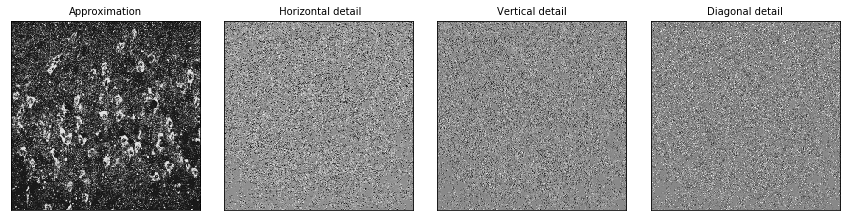

In [56]:
# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(contrast_image, 'coif1')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

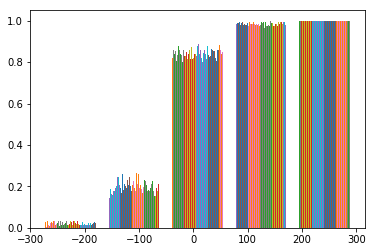

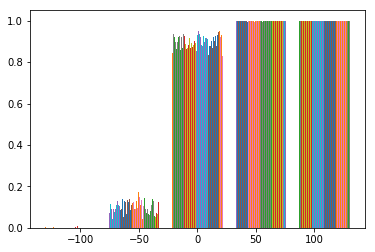

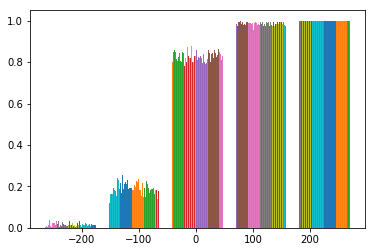

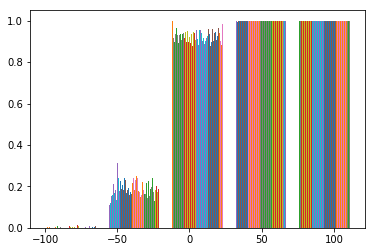

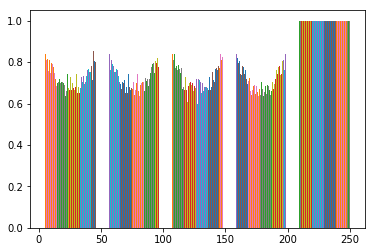

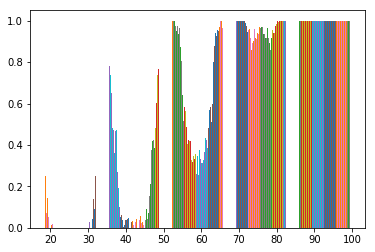

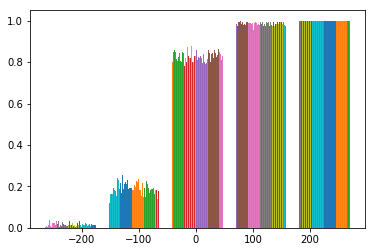

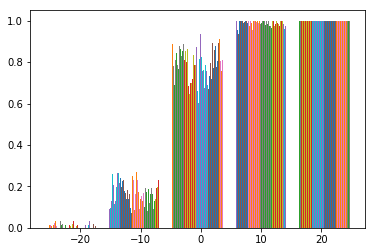

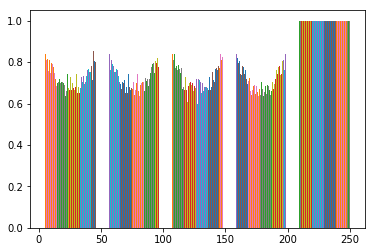

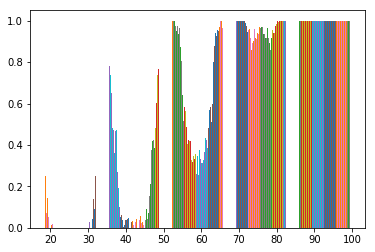

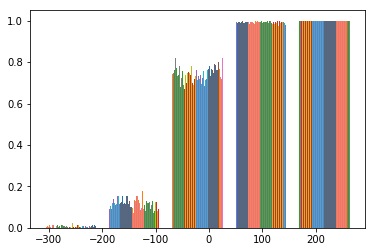

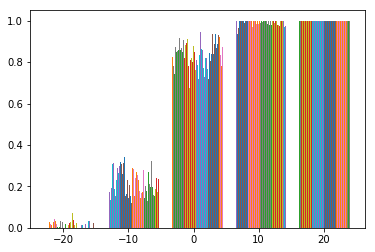

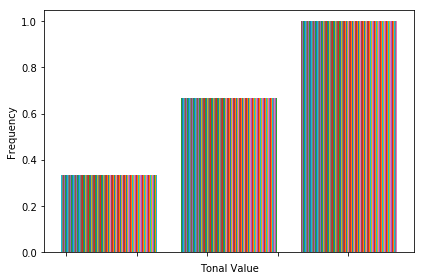

In [57]:
mult.Multi_res_hist_full(HL, bin_list, gauss_blur_list)

In [46]:
m_spec = ft.Magnitude_Spectrum(LH)

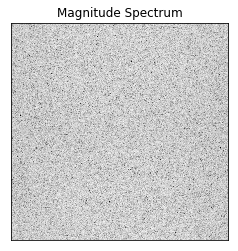

In [47]:
ft.Plot_M_Spec(m_spec)

In [48]:
enhanced_im  = prepro.im_contrast(m_spec, contrast_value)

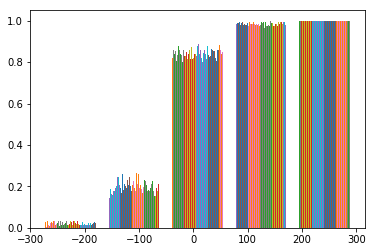

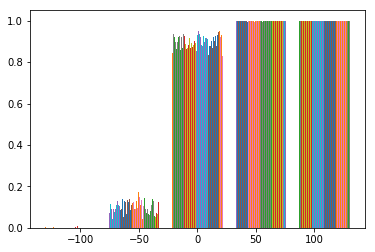

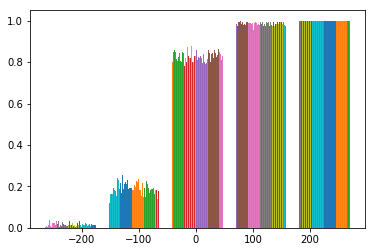

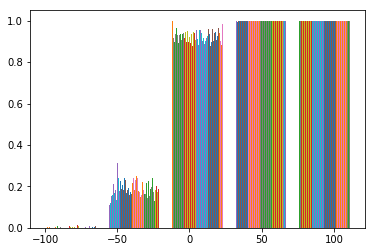

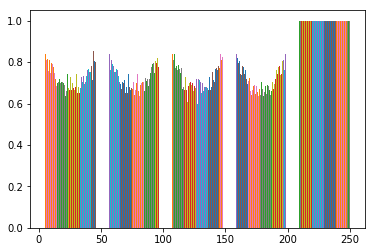

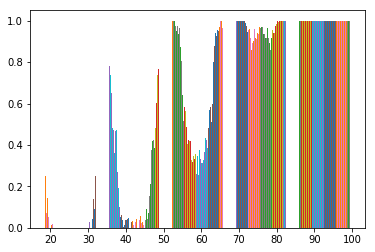

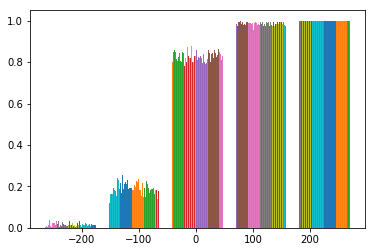

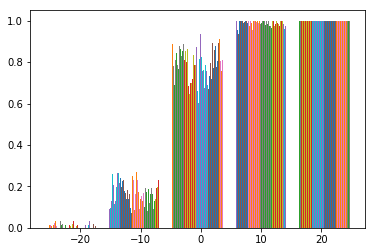

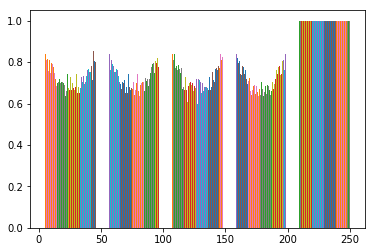

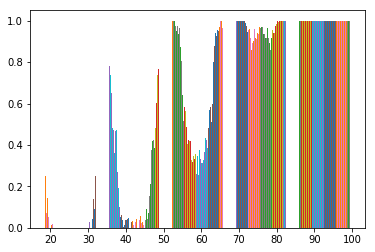

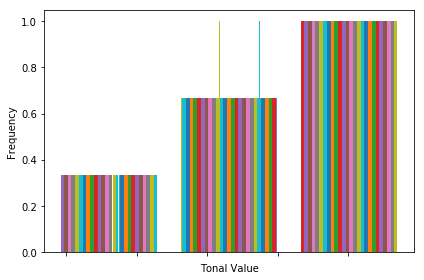

In [49]:
mult.Multi_res_hist_full(enhanced_im, bin_list, gauss_blur_list)